# Generate initial state

In [1]:
import mode_analysis_code

In [2]:
mode_analysis = mode_analysis_code.ModeAnalysis(N=19, Vwall=1, frot=180)

In [3]:
mode_analysis.run()

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

## Axial energy eigenvalues

In [5]:
mode_analysis.axialEvals

array([ 0.96057671,  0.96294711,  0.96559845,  0.96563605,  0.9713378 ,
        0.97204588,  0.97507747,  0.97595003,  0.97607102,  0.97803311,
        0.97810016,  0.98068871,  0.98075547,  0.98275233,  0.98650685,
        0.98654148,  0.99208231,  0.99242248,  1.        ])

<IPython.core.display.Javascript object>


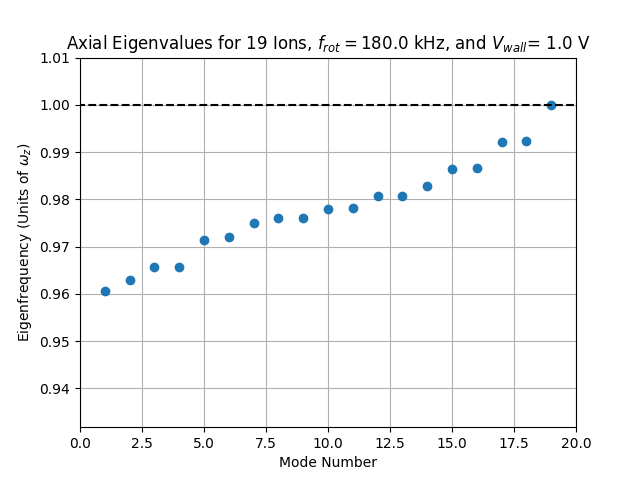

In [19]:
mode_analysis.show_axial_Evals();

As part of the mode_analysis.run() call the positions of the ions in the rest frame have been calculated and stored in u. Here they are:

<IPython.core.display.Javascript object>


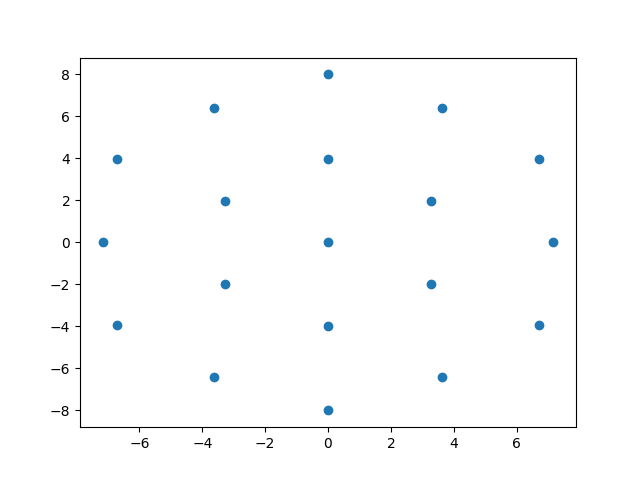

In [9]:
plt.figure()
plt.plot(mode_analysis.u[:19], mode_analysis.u[19:],'o')

# Units

Most calcualtions are done in a dimensionless system of units. Conversion to dimensionless and experimental form are done with the following two methods:

```
    def dimensionless(self):
        """Calculate characteristic quantities and convert to a dimensionless
        system
        """
        # characteristic length
        self.l0 = ((self.k_e * self.q ** 2) / (.5 * self.m_Be * self.wz ** 2)) ** (1 / 3)
        self.t0 = 1 / self.wz  # characteristic time
        self.v0 = self.l0 / self.t0  # characteristic velocity
        self.E0 = 0.5*self.m_Be*(self.wz**2)*self.l0**2 # characteristic energy
        self.wr = self.wrot / self.wz  # dimensionless rotation
        self.wc = self.wcyc / self.wz  # dimensionless cyclotron
        self.md = self.m / self.m_Be  # dimensionless mass

    def expUnits(self):
        """Convert dimensionless outputs to experimental units"""
        self.u0E = self.l0 * self.u0  # Seed lattice
        self.uE = self.l0 * self.u  # Equilibrium positions
        self.axialEvalsE = self.wz * self.axialEvals
        self.planarEvalsE = self.wz * self.planarEvals
        # eigenvectors are dimensionless anyway
```

Apparently the characteristic length is
$
l_0 = \left(\frac{q^2}{4\pi\epsilon_0}/(m \omega_z^2/2)\right)^{1/3}
$
Not quite sure what the meaning of this length scale is.


## Trap potential

The `ModeAnalysis.__init__()` method takes a parameter `Vtrap` that specifies the electrostatic potentials as far as I can tell. A comment in the source code suggests that the three components of this vector are the voltages on the end, middle, and center trap electrodes. Presumably these are in Volts. Inside `__init__()` we then calculate 0th, first, second, and fourth order moments of the trap potential at the center of the trap from the voltages. These are compute using a 4x3 matrix that is explained in "Teale's final paper". The result is stored in `self.Coeff`. The axial trap frequency is computed from this as follows:
$$
\omega_z=\sqrt{2 q {\tt self.Coeff[2]} / m}
$$
So this suggests that `self.Coeff[2]` corresponds to what I've been calling $k_z$.

A "wall potential" of $V_{\rm wall}=5$ is translated into a coefficient ${\tt self.Cw2} = q V_{\rm wall} 1612$. Apparently this is not used anymore. Instead, we use the parameter ${\tt self.Cw} = 1612 V_{\rm wall} / V_0$ where $V_0 = 1/2 m \omega_z^2 / q$ which really reduces to ${\tt self.Coeff[2]}$. I think this make `self.Cw` equivalent with the parameter $\delta$ I've been using up to perhaps a factor of 2 which I need to check on. The stronger axis of the trap is along $x$, the weaker axis is along $y$.

Apparently we are using a trap rotation frequency of $180 {\rm kHz}$ by default.

The default axial magnetic field is $B_z=4.4588T$.


## Positions

In [10]:
mode_analysis.Cw

0.00033752977203130319

In [11]:
mode_analysis.expUnits()

<IPython.core.display.Javascript object>


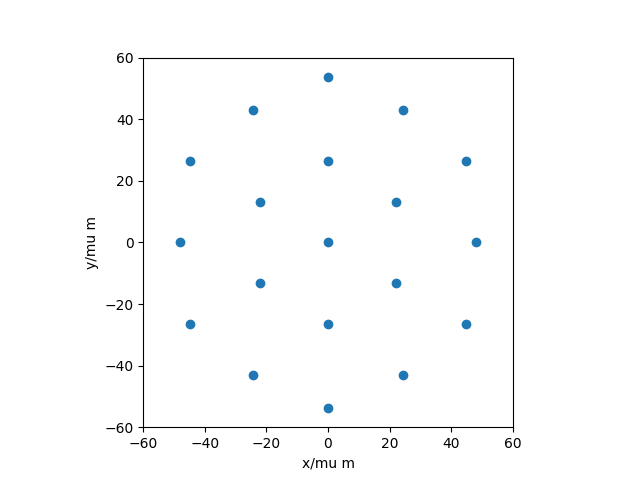

In [18]:
plt.figure()
plt.plot(1.0e6 * mode_analysis.uE[:19], 1.0e6 * mode_analysis.uE[19:], 'o');
plt.xlabel('x/mu m')
plt.ylabel('y/mu m')
rmax = 60.0
for l in [plt.xlim, plt.ylim]:
    l([-rmax, rmax])
plt.gca().set_aspect(1)